In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import *
import numpy as np
import tensorflow as tf
from livelossplot import PlotLossesKeras

In [2]:
source = "C:\\Users\\mimus\\Documents\\curso_deep_learning\\data\\catvsdog\\"

In [3]:
train = tf.keras.preprocessing.image_dataset_from_directory(
  source,
  shuffle = False,
  validation_split=0.3,
  subset="training",
  image_size=(128, 128),
  batch_size=64)

val = tf.keras.preprocessing.image_dataset_from_directory(
  source,
  shuffle = False,
  validation_split=0.3,
  subset="validation",
  image_size=(128, 128),
  batch_size=64)

Found 2408 files belonging to 2 classes.
Using 1686 files for training.
Found 2408 files belonging to 2 classes.
Using 722 files for validation.


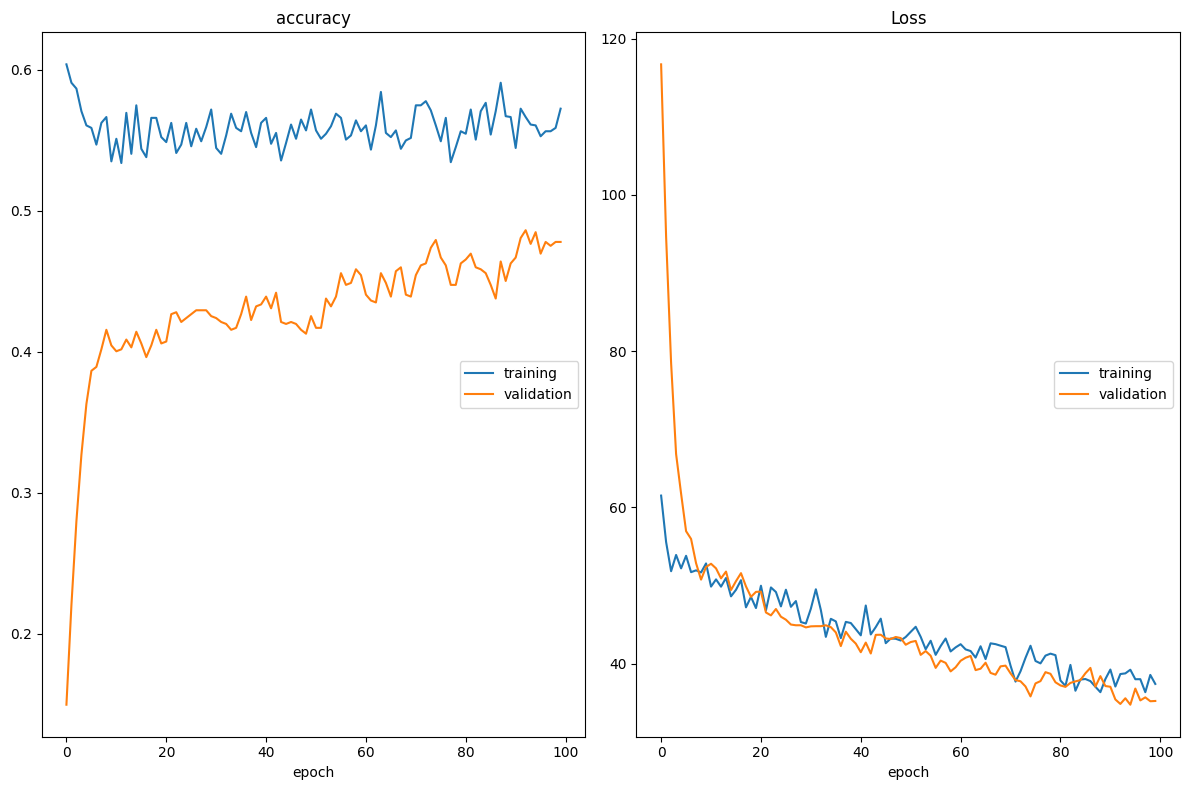

accuracy
	training         	 (min:    0.534, max:    0.604, cur:    0.572)
	validation       	 (min:    0.150, max:    0.486, cur:    0.478)
Loss
	training         	 (min:   36.369, max:   61.524, cur:   37.425)
	validation       	 (min:   34.767, max:  116.701, cur:   35.245)
27/27 [==============================] - 1s 32ms/step - loss: 37.4251 - accuracy: 0.5724 - val_loss: 35.2449 - val_accuracy: 0.4778


In [4]:
plotlosses = PlotLossesKeras()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128,3)),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation="sigmoid")
])



model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1e-6),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              )

model.fit(train, epochs=100, validation_data=val,callbacks = [plotlosses])